## Complex Example - MNIST


### Loading MNIST dataset

In [45]:
import pylab
from matplotlib import gridspec
from sklearn.datasets import make_classification
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import pickle
import os
import gzip

# pick the seed for reproducability - change it to explore the effects of random variations
np.random.seed(1)
import random

with gzip.open("mnist.pkl.gz", "rb") as f:
    MNIST = pickle.load(f, encoding="latin1")      # or encoding="bytes"

# unpack once
(train_set, valid_set, test_set) = MNIST

# rebuild the structure the notebook assumes
MNIST = {
    "Train": {
        "Features": train_set[0],
        "Labels":   train_set[1],
    },
    "Validation": {
        "Features": valid_set[0],
        "Labels":   valid_set[1],
    },
    "Test": {
        "Features": test_set[0],
        "Labels":   test_set[1],
    },
}

### plot the dataset

In [46]:
features = MNIST['Train']['Features'].astype(np.float32) / 256.0
# print(features[0])
print(features[0].reshape(28,28))

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01171875 0.0703125
 0.0703125  0.0703125  0.4921875  0.53125    0.68359375 0.1015625
 0.6484375  0.99609375 0.96484375 0.49609375 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.1171875  0.140625
 0.3671875  0.6015625 ]
5


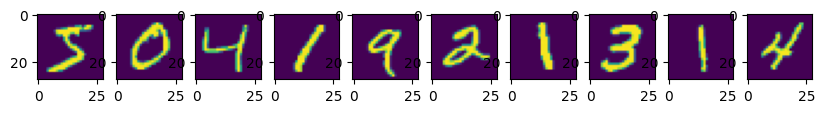

In [47]:
print(MNIST['Train']['Features'][0][130:180])
print(MNIST['Train']['Labels'][0])
features = MNIST['Train']['Features'].astype(np.float32) / 256.0
labels = MNIST['Train']['Labels']
fig = pylab.figure(figsize=(10,5))
for i in range(10):
    ax = fig.add_subplot(1,10,i+1)
    pylab.imshow(features[i].reshape(28,28))
pylab.show()

### recognizing only two digits.

In [48]:
def set_mnist_pos_neg(positive_label, negative_label):
    positive_indices = [i for i, j in enumerate(MNIST['Train']['Labels'])
                        if j == positive_label]
    negative_indices = [i for i, j in enumerate(MNIST['Train']['Labels'])
                        if j == negative_label]

    positive_images = MNIST['Train']['Features'][positive_indices]
    negative_images = MNIST['Train']['Features'][negative_indices]

    fig = pylab.figure()
    ax = fig.add_subplot(1, 2, 1)
    pylab.imshow(positive_images[0].reshape(28,28), cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    ax = fig.add_subplot(1, 2, 2)
    pylab.imshow(negative_images[0].reshape(28,28), cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    pylab.show()

    return positive_images, negative_images

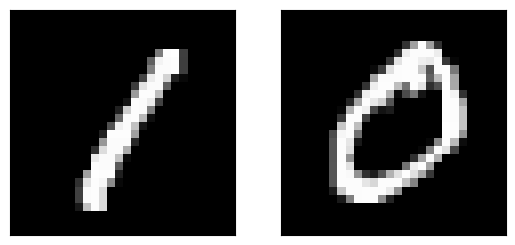

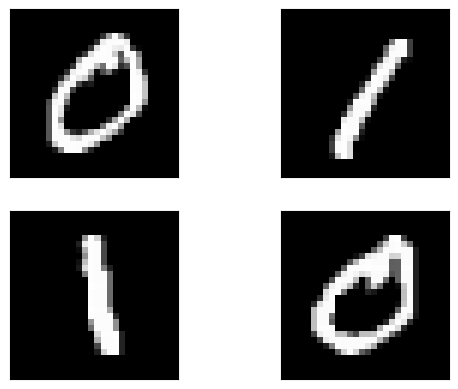

In [71]:
# pos1,neg1 = set_mnist_pos_neg(1,0)
#
# positive_indices = [i for i, j in enumerate(MNIST['Train']['Labels'])
#                     if j == 0]
# negative_indices = [i for i, j in enumerate(MNIST['Train']['Labels'])
#                     if j == 1]
#
# positive_images = MNIST['Train']['Features'][positive_indices]
# negative_images = MNIST['Train']['Features'][negative_indices]
#
# fig = pylab.figure()
#
# ax = fig.add_subplot(2, 2, 1)
# pylab.imshow(positive_images[0].reshape(28,28), cmap='gray', interpolation='nearest')
# ax.set_xticks([])
# ax.set_yticks([])
#
# ax = fig.add_subplot(2, 2, 2)
# pylab.imshow(negative_images[0].reshape(28,28), cmap='gray', interpolation='nearest')
# ax.set_xticks([])
# ax.set_yticks([])
#
# ax = fig.add_subplot(2, 2, 3)
# pylab.imshow(negative_images[1].reshape(28,28), cmap='gray', interpolation='nearest')
# ax.set_xticks([])
# ax.set_yticks([])
#
# ax = fig.add_subplot(2, 2, 4)
# pylab.imshow(positive_images[1].reshape(28,28), cmap='gray', interpolation='nearest')
# ax.set_xticks([])
# ax.set_yticks([])
#
# pylab.show()
# # print(len(pos1))

In [85]:
def train_graph(positive_examples, negative_examples, num_iterations = 100):
    num_dims = positive_examples.shape[1]
    weights = np.zeros((num_dims,1)) # initialize weights

    pos_count = positive_examples.shape[0]
    neg_count = negative_examples.shape[0]

    report_frequency = 15
    snapshots = []

    for i in range(num_iterations):
        pos = random.choice(positive_examples)
        neg = random.choice(negative_examples)

        z = np.dot(pos, weights)
        if z < 0:
            weights = weights + pos.reshape(weights.shape)

        z  = np.dot(neg, weights)
        if z >= 0:
            weights = weights - neg.reshape(weights.shape)

        if i % report_frequency == 0:
            pos_out = np.dot(positive_examples, weights)
            neg_out = np.dot(negative_examples, weights)
            pos_correct = (pos_out >= 0).sum() / float(pos_count)
            neg_correct = (neg_out < 0).sum() / float(neg_count)
            # make correction a list so it is homogeneous to weights list then numpy array accepts
            snapshots.append((weights.flatten(), (pos_correct + neg_correct) / 2.0))

    return np.array(snapshots, dtype=object)  # Use dtype=object for mixed types

def plotit2(snapshots_mn,step):
    fig = pylab.figure(figsize=(10,4))
    ax = fig.add_subplot(1, 2, 1)
    pylab.imshow(snapshots_mn[step][0].reshape(28, 28), interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
    pylab.colorbar()
    ax = fig.add_subplot(1, 2, 2)
    ax.set_ylim([0,1])
    pylab.plot(np.arange(len(snapshots_mn[:,1])), snapshots_mn[:,1])
    pylab.plot(step, snapshots_mn[step,1], "bo")
    pylab.show()
def pl3(step): plotit2(snapshots_mn,step)
def pl4(step): plotit2(snapshots_mn2,step)

In [86]:
pos1,neg1 = set_mnist_pos_neg(1,0)
snapshots_mn = train_graph(pos1,neg1,1000)
interact(pl3, step=widgets.IntSlider(value=0, min=0, max=len(snapshots_mn) - 1))

interactive(children=(IntSlider(value=0, description='step', max=66), Output()), _dom_classes=('widget-interac…

<function __main__.pl3(step)>

### try different digits:

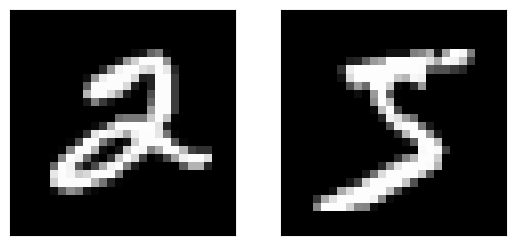

In [52]:
pos2,neg2 = set_mnist_pos_neg(2,5)

In [81]:
snapshots_mn2 = train_graph(pos2,neg2,1000)
interact(pl4, step=widgets.IntSlider(value=0, min=0, max=len(snapshots_mn2) - 1))

interactive(children=(IntSlider(value=0, description='step', max=66), Output()), _dom_classes=('widget-interac…

<function __main__.pl4(step)>

### PCA - Principal Component Analysis

In [78]:
from sklearn.decomposition import PCA

def pca_analysis(positive_label, negative_label):
    positive_images, negative_images = set_mnist_pos_neg(positive_label, negative_label)
    M = np.append(positive_images, negative_images, 0)
    print(M.shape)

    mypca = PCA(n_components=2)
    mypca.fit(M)

    pos_points = mypca.transform(positive_images[:200])
    neg_points = mypca.transform(negative_images[:200])

    pylab.plot(pos_points[:,0], pos_points[:,1], 'bo')
    pylab.plot(neg_points[:,0], neg_points[:,1], 'ro')

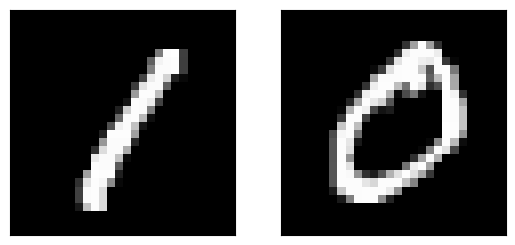

(10610, 784)


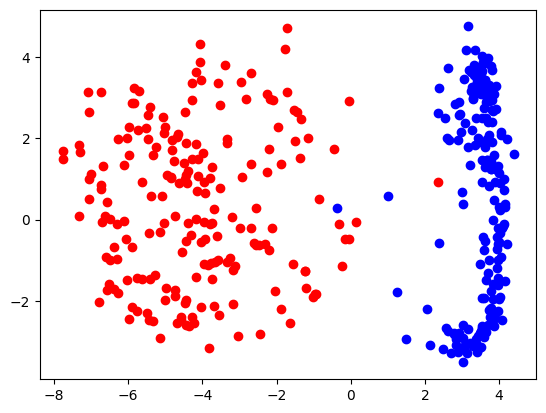

In [79]:
pca_analysis(1,0)


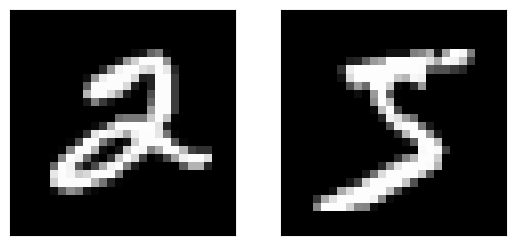

(9474, 784)


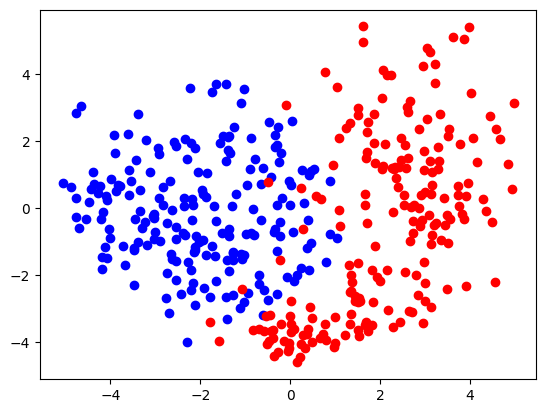

In [80]:
pca_analysis(2,5)
